# Inverted Pendulum
##### Sean Wade

In [48]:
from __future__ import division
import numpy as np
import numpy.linalg as la
import scipy.optimize as opt
from scipy.integrate import odeint
from scipy.linalg import solve_continuous_are

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.display import HTML
import urllib2
HTML(urllib2.urlopen('http://seanwade.com/jupyter.css').read())

## Problem 1

In [11]:
def linearized_init(M, m, l, q1, q2, q3, q4, r):
    '''
    Parameters:
    ----------
    M, m: floats
    masses of the rickshaw and the present
    l : float
    length of the rod
    q1, q2, q3, q4, r : floats
    relative weights of the position and velocity of the rickshaw, ←-
    the
    angular displacement theta and the change in theta, and the ←-
    control
    Return
    -------
    A : ndarray of shape (4,4)
    B : ndarray of shape (4,1)
    Q : ndarray of shape (4,4)
    R : ndarray of shape (1,1)
    '''
    g = 9.8
    A = np.array(
    [[0, 1, 0, 0],
    [0, 0, (m*g)/M, 0],
    [0, 0, 0, 1],
    [0, 0, (g/(M*l))*(M + m), 0]])
    
    B = np.zeros((4, 1))
    B[1][0] = 1/M
    B[3][0] = 1/(M*l)
    Q = np.diag([q1, q2, q3, q4])
    R = np.array([[r]])
    return A, B, Q, R

## Problem 2

In [49]:
def find_P(A, B, Q, R, use_solve=False):
    """
    Parameters:
    ----------
    A, Q    : ndarrays of shape (4,4)
    B       : ndarray of shape (4,1)
    R       : ndarray of shape (1,1)
    Returns
    -------
    P : the matrix solution of the Riccati equation
    """
    if not use_solve:
        def P_function(P,A,B,Q,R):
            P = P.reshape((4,4))
            eq = P.dot(A) + A.T.dot(P) + Q - P.dot(B).dot(np.linalg.inv(R)).dot(B.T).dot(P)
            eq = eq.reshape(16)
            return eq
        initial_guess = np.ones((16,1)) * .1
        P = opt.root(P_function, initial_guess, args = (A,B,Q,R)).x
        return P.reshape((4,4))
    else:
        return solve_continuous_are(A, B, Q, R)

In [50]:
M, m = 23, 5
l = 4
q1, q2, q3, q4 = 1, 1, 1, 1
r = 5

A, B, Q, R = linearized_init(M, m, l, q1, q2, q3, q4, r)

P = find_P(A, B, Q, R)
e_vals, e_vecs = np.linalg.eig(A - B.dot(np.linalg.inv(R).dot(B.T.dot(P))))
print 'P'
print '-'*20
print P
print '\nEigen values'
print '-'*20
print e_vals

P
--------------------
[[   3.31318527   27.71070258   -2.17095788  -19.85960605]
 [  27.69900243  469.44071558  -16.66743876 -335.2588233 ]
 [  -2.17029374  -16.67590375 -274.23847645   11.73566339]
 [ -19.85123379 -335.25932002   11.73118012  331.85700635]]

Eigen values
--------------------
[-1.72812265+0.j         -0.05988189+0.05894939j -0.05988189-0.05894939j
  1.72593850+0.j        ]


Since there are eigenvalues that are negative and real it will diverge, so It won't go to zero.

## Problem 3

In [51]:
def rickshaw(tv, X0, A, B, Q, R, P):
    '''
    Parameters:
    ----------
    tv : ndarray of time values, with shape (n+1,)
    X0 : Initial conditions on state variables
    A, Q: ndarrays of shape (4,4)
    B : ndarray of shape (4,1)
    R : ndarray of shape (1,1)
    P : ndarray of shape (4,4)
    Returns
    -------
    Z : ndarray of shape (n+1,4), the state vector at each time
    U : ndarray of shape (n+1,), the control values
    '''
    def z_function(z, t):
        return np.dot(A - B.dot((1/R).dot(B.T.dot(P))), z)
    
    Z = odeint(z_function, X0, tv)
    U = (1/R).dot(B.T.dot(P)).dot(Z.T)[0]
    return Z, U

In [52]:
def plot(T, Z, U):
    #plt.figure(figsize=(20,10))
    plt.title('')
    plt.plot(T, Z[:, 0], label='x')
    plt.plot(T, Z[:, 1], label='$\dot{x}$')
    plt.plot(T, Z[:, 2], label=r'$\theta$')
    plt.plot(T, Z[:, 3], label=r'$\dot{\theta}$')
    plt.plot(T, U, label='U')
    plt.legend(loc='best')
    plt.show()

## Problem 4

In [73]:
def solver(M, m, l, q1, q2, q3, q4, r, tf, use_are=False):
    tv = np.linspace(0, tf,100)
    A, B, Q, R = linearized_init(M, m, l, q1, q2, q3, q4, r)
    P = find_P(A, B, Q, R, use_solve=use_are)
    Z, U = rickshaw(tv, X0, A, B, Q, R, P)
    plot(tv, Z, U)

In [74]:
M, m = 23., 5.
l = 4.
q1, q2, q3, q4 = 1., 1., 1., 1.
r = 10.
X0 = np.array([-1, -1, .1, -.2])

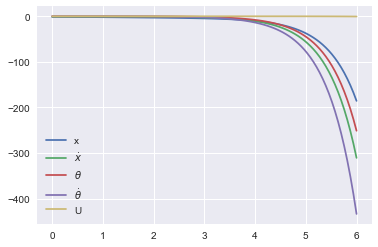

In [75]:
solver(M, m, l, q1, q2, q3, q4, r, tf=6, use_are=False)

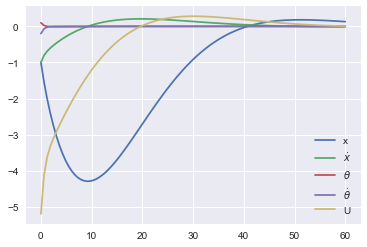

In [76]:
solver(M, m, l, q1, q2, q3, q4, r, tf=60, use_are=True)

With the ARE solver it converges over the long time, while the other one is good at first, but diverges quickly.

## Problem 5

In [77]:
M, m = 23., 5.
l = 4.
q1, q2, q3, q4 = 1., 1., 1., 1.
r = 10.

Plotting:  [-1.         -1.         -1.1329822  -0.53943027]


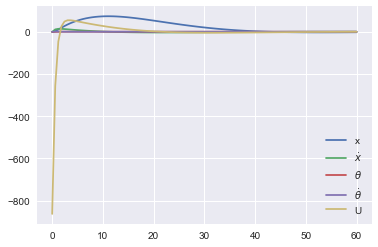

Plotting:  [-1.         -1.          0.17070851 -0.1465335 ]


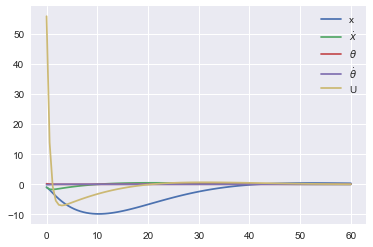

Plotting:  [-1.         -1.          0.09598079 -0.20600325]


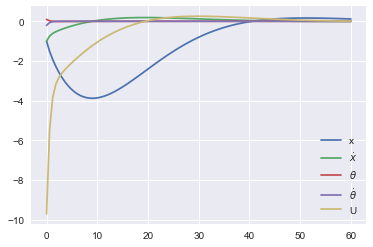

Plotting:  [-1.        -1.         0.1010352 -0.1995566]


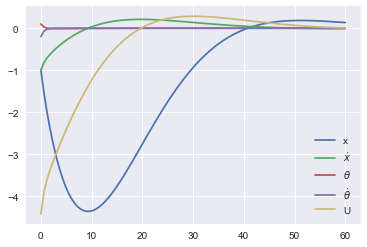

Plotting:  [-1.         -1.          0.10014152 -0.19991715]


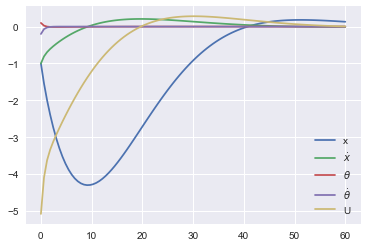

Plotting:  [-1.         -1.          0.10001451 -0.19999532]


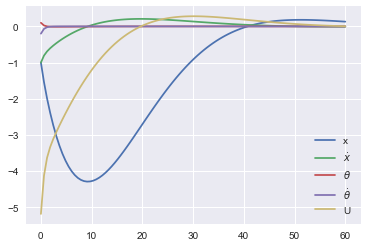

Plotting:  [-1.         -1.          0.09999966 -0.19999973]


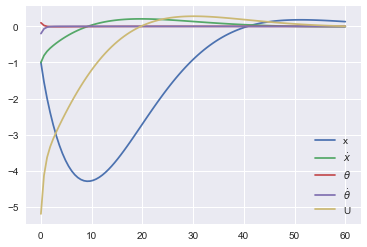

Plotting:  [-1.         -1.          0.10000004 -0.19999999]


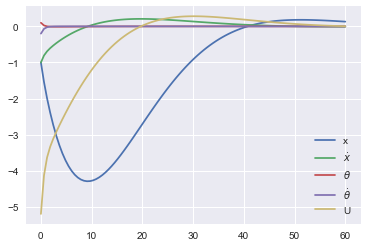

Plotting:  [-1.         -1.          0.09999999 -0.2       ]


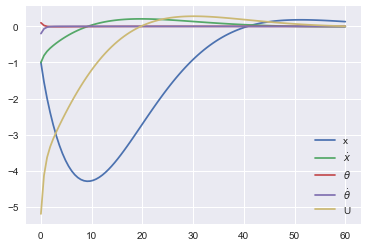

Plotting:  [-1.  -1.   0.1 -0.2]


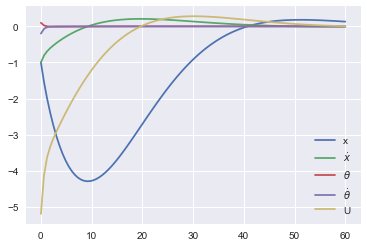

In [81]:
for i in range(10):
    X0 = np.array([-1, -1, .1, -.2])
    X0[2] += np.random.randn(1)[0]*10**(-i)
    X0[3] +=np.random.randn(1)[0]*10**(-i)
    print "Plotting: ", X0
    solver(M, m, l, q1, q2, q3, q4, r, tf=60, use_are=True)

When theta is large it has dramatic changes.  When it is small it performs will because of the linearization.